In [97]:
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
# red, blue, green, yellow, purple, orange, teal blue, pink, other color
palette=['#ff3b30', '#4cd964','#ffcc00',  '#007aff','#5856d6', '#ff9500', '#5ac8fa', '#ff2d55','#969783']
markers=['o', '^', '<', 'd', '*','2']
hatches = ['/', '\\', '|', '-', '+', 'x','o']#  'O', '.', '*']
sns.set_style("ticks")
import matplotlib as mpl
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['lines.linewidth']=1
rc("font", **{'family':'serif','serif':['Palatino'], 'size':12})
rc('text', usetex=True)
import os

In [98]:
!pwd

/Users/jiangnanhugo/PycharmProjects/xor_smt/plots


basepath="."

In [109]:
def flatten(list_of_lists):
    final=[]
    for li in list_of_lists:
        final+=li
    return final

def plot_time_metric(total,xaxis, name, title, ylabel="", xlabel="", basepath=".",show_title=False, show_ylabel=True):
    method_names=[]
    values={}
    for line in total.split("\n"):
        spl=line.split("\t")
        print(spl)
        method_names.append(spl[0])
        values[spl[0]]=[float(x) for x in spl[1:]]
    total_xasis=[]
    for m in method_names:
        total_xasis.append([val for val in xaxis.split("\t")])
    print(len(flatten([values[m] for m in method_names])))
    print(len(total_xasis))
    df=pd.DataFrame({
        "model": flatten([values[m] for m in method_names]),
        "algorithms": flatten([[m,]* len(values[m]) for m in method_names]),
        'total_xasis': flatten(total_xasis)
    })
    print(df.head())
    

    plt.figure(figsize=(3,3))
    ax=sns.barplot(data=df, x="total_xasis", y="model", 
                   width=0.7, hue="algorithms",
                    palette=palette)
    # Define some hatches
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
    # Loop over the bars
    # for i,thisbar in enumerate(ax.patches):
    #     print(i)
    #     thisbar.set_hatch(hatches[i%len(hatches)])
    
    if show_title==True:
        ax.set_title(title, fontsize=16)
    
    ax.set(ylabel=ylabel, xlabel=xlabel)
    plt.yscale('log', base=10)
    if show_ylabel==False:
        ax.set(yticklabels=[])
    
#   
    fname = os.path.join(basepath, name+"_time.pdf")
    plt.savefig(fname, bbox_inches='tight', pad_inches=0)

['XOR-SMC (ours)', '0.08', '0.32', '0.59']
['SAA-BP', '16.54', '2.71', '1.82']
['SAA-Gibbs', '15.3', '3.69', '1.26']
['SAA-Imp', '15.95', '2.97', '1.78']
['SAA-LoopyImp', '17.35', '4.37', '2.77']
['SAA-Weighted', '21.07', '3.27', '1.36']
18
6
   model      algorithms total_xasis
0   0.08  XOR-SMC (ours)         15%
1   0.32  XOR-SMC (ours)         30%
2   0.59  XOR-SMC (ours)         50%
3  16.54          SAA-BP         15%
4   2.71          SAA-BP         30%


/var/folders/1c/8_t_8nt12b9fdnw5n_xvj9m40000gn/T/ipykernel_28360/1893826117.py:29: UserWarning: The palette list has more values (9) than needed (6), which may not be intended.
  ax=sns.barplot(data=df, x="total_xasis", y="model",


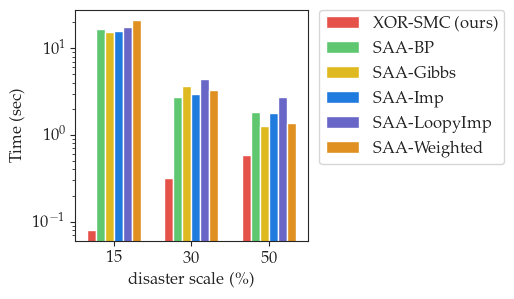

In [110]:
total="""XOR-SMC (ours)	0.08	0.32	0.59
SAA-BP	16.54	2.71	1.82
SAA-Gibbs	15.3	3.69	1.26
SAA-Imp	15.95	2.97	1.78
SAA-LoopyImp	17.35	4.37	2.77
SAA-Weighted	21.07	3.27	1.36"""
scales="15%	30%	50%"
name='time_by_disaster_scale'
title="time by disaster scale"
ylabel="Time (sec)"
xlabel="disaster scale (\%)"
plot_time_metric(total,scales, name, title, ylabel, xlabel)

Max in-degree:  3
Max out-degree:  3
Back-and-forth edges:  324
Total edges:  0


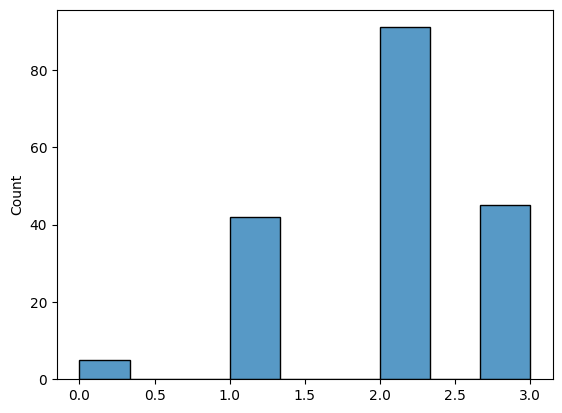

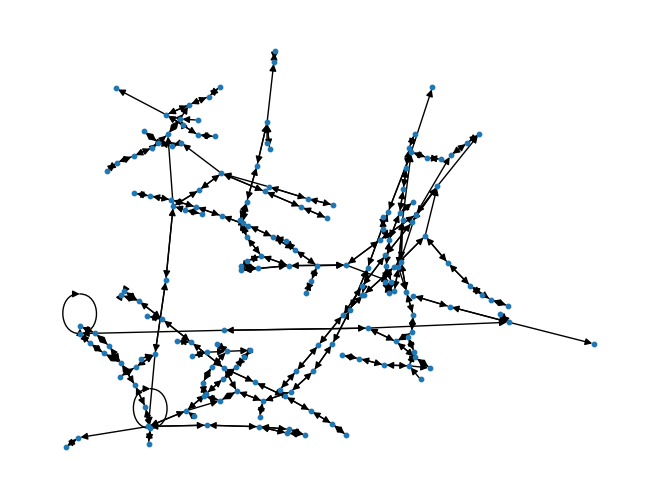

[0, 128, 1, 6, 136, 137, 10, 13, 14, 143, 144, 147, 149, 150, 151, 23, 157, 158, 159, 160, 161, 162, 31, 41, 42, 43, 44, 51, 181, 74, 75, 76, 77, 78, 94, 95, 97, 98, 99, 103, 104, 120, 121, 127]


In [15]:
import networkx as nx 
from graph import Graph
import matplotlib.pyplot as plt 
from utils_data import *

g = Graph()
# g.readFromTSPFile("../graphs/tsphcp/COL_1000.hcp")
g.readFromFile("../graphs/graph_hawaii_200.txt")

checkGraphDetails(g)

Gd = nx.DiGraph()

for i in range(g.N): 
    for j in range(g.N): 
        if g.Adj[i][j] == 1: 
            Gd.add_edge(i,j) 


nx.draw(Gd, node_size=10) 
plt.show() 

sccs = nx.strongly_connected_components(Gd) 
largest_component = []
for scc in sccs: 
    if len(scc) > len(largest_component): 
        largest_component = list(scc)

print(largest_component)

In [ ]:
[165, 41, 173, 32, 113, 50, 106, 142, 48]
[1.842499017715454, 154.63378953933716, 3.658205509185791, 3.6972780227661133, 50.913981676101685, 1.856348991394043, 1.9073190689086914, 2.774786949157715, 3.7066409587860107, 2.772657632827759]


# quick sample 41-- 5184, 10368, 5184


[165, 42, 173, 32, 113, 165, 50, 106, 142, 48]
[1.8610010147094727, 190.62020087242126, 3.649575710296631, 3.7034239768981934, 42.854044675827026, 1.861560583114624, 1.9083623886108398, 2.7663729190826416, 3.7284727096557617, 2.783719778060913]

# unigen sample 42 -- 10368, 10368, 10368

# random starting points:
# 165 10 173 32 113 50 106 142 48


# gibbs
# [165, 10, 83, 150]
# [1.838456392288208, 1616.2424755096436, 2.8099820613861084]
# 10  -- 10368, 5184, 10368

# My best: 
# 94 -- 15552, 10368, 15552
# 150 -- log10-estimate 4.1917862475822 -- 15552
# 113 -- log10-estimate 4.1917862475822 -- 15552

# 90 -- 15552, 10368, 15552


In [10]:
import numpy as np

np.random.seed(1086)
for _ in range(10):
    start = np.random.randint(0, 184)
    print(start)

27
51
60
136
67
162
4
169
156
27
